In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Set the style for seaborn plots

# URL for the housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url) # Read the CSV file into a pandas DataFrame

housing.head() # Display the first 5 rows of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
housing.shape # Display the shape (number of rows and columns) of the DataFrame

housing.info() # Print a summary of the DataFrame, including data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
housing.describe() # Generate descriptive statistics of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
housing.isna().sum() # Count the number of missing (NaN) values in each column

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [23]:
housing.columns # Display the column names of the DataFrame

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
# For simplicity, drop rows with any missing value in the columns we'll use
cols_for_now = ["median_house_value", "median_income", "housing_median_age",
                "total_rooms", "population"]
clean = housing[cols_for_now].dropna()

clean.isna().sum()


,0
median_house_value,0
median_income,0
housing_median_age,0
total_rooms,0
population,0


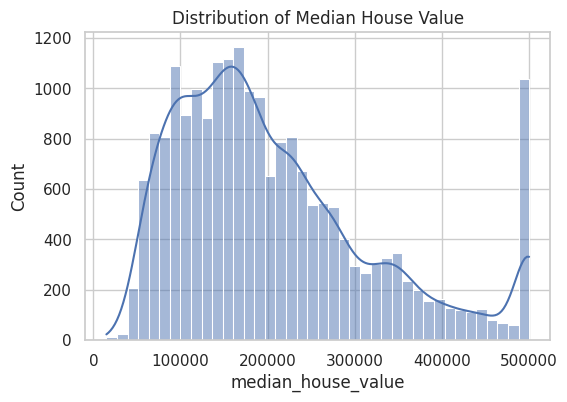

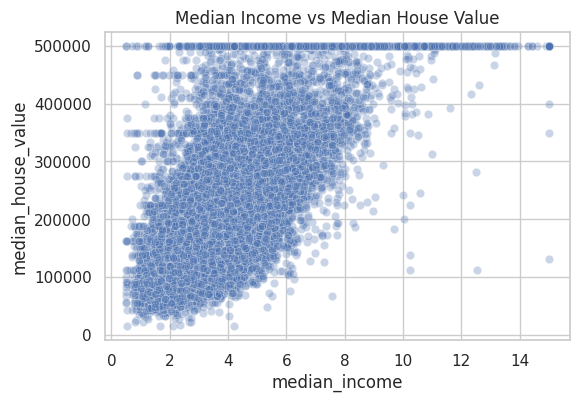

In [25]:
# Histogram of median_house_value
plt.figure(figsize=(6,4))
sns.histplot(data=clean, x="median_house_value", bins=40, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

# Relationship between median_income and median_house_value
plt.figure(figsize=(6,4))
sns.scatterplot(data=clean, x="median_income", y="median_house_value", alpha=0.3)
plt.title("Median Income vs Median House Value")
plt.show()


In [26]:
# Target and features
y = clean["median_house_value"]
feature_cols = ["median_income", "housing_median_age", "total_rooms", "population"]
X = clean[feature_cols]

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_valid.shape


((16512, 4), (4128, 4))

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Pipeline 1: Linear Regression
linreg_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("model", LinearRegression())
    ]
)

# Pipeline 2: Random Forest
rf_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler()),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

# Fit both models
linreg_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)

# Predict
y_pred_lin = linreg_pipe.predict(X_valid)
y_pred_rf = rf_pipe.predict(X_valid)

# Evaluate
mae_lin = mean_absolute_error(y_valid, y_pred_lin)
mae_rf = mean_absolute_error(y_valid, y_pred_rf)

mae_lin, mae_rf


(60483.99351289373, 55827.28708091085)